In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re
from numpy.linalg import inv
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV, LassoCV
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_squared_error
from itertools import chain, combinations
import scipy.stats as stats
np.random.seed(999)

### Classes for Lasso, Ridge and Analytical Solution

In [2]:
class GradientDescent():
 
    #  Batch Gradient Descent optimization for lasso regression as function of the regularization parameter.
    def gd_quad(self, theta, x, y, lam, learning_rate=0.01, num_steps=600):
        m = len(x)
        if len(theta) > 2:
            x= np.insert(x, 0, 1, axis=1)
        else :
            x= np.insert(x.reshape(-1,1), 0, 1, axis=1)
        error = []
        for i in range(0, num_steps):
            theta = theta - (learning_rate * (((np.dot((np.sum(theta * x, axis=1) - y).reshape(-1,m), x) /m) + np.multiply(lam,np.sign(theta)))[0]))
        return theta, error    
    
    # Analytical Solution for least squares regression
    def analytical(self,x, y):
        x= np.insert(x, 0, 1, axis=1)
        t = np.dot(inv(np.dot(np.transpose(x), x)), np.dot(np.transpose(x), y))
        return t
    
    #Analytical Solution for ridge regression as function of the regularization parameter 
    def analytical_ridge(self, x, y, lam):
        x = np.insert(x, 0, 1, axis=1)
        i = np.identity(len(x[0]))
        t = np.dot(inv(np.dot(np.transpose(x), x) + (lam*i)), np.dot(np.transpose(x), y))
        return t

In [3]:
def init(size=50):
    X_i = np.random.uniform(low=-2,high=2,size=50)
    e = np.random.normal(loc=0, scale=2, size=50)
    Y = 2 + X_i*3 + e
    X_5i = np.array([X_i, X_i**2, X_i**3, X_i**4, X_i**5]).T
    theta = np.random.randint(low=0, high=10, size=6).T
    gd = GradientDescent()
    return X_i, X_5i, Y, theta, gd

In [4]:
def gen_hist(reps, style, lam=0):
    slopes = []
    pred_x = 1.5
    pred_X = np.array([1, pred_x, pred_x**2, pred_x**3, pred_x**4, pred_x**5])
    predicted = []
    for i in range(0, reps):
        X_i, X_5i, Y, theta, gd = init()
        if style == 'gd':
            t, e = gd.gd_quad(theta, X_5i, Y, lam, learning_rate=0.001, num_steps=2000)
            #t, e = gd.gd_quad(theta[:2], X_i, Y, lam)
        elif style == 'ana':
            t = gd.analytical(X_5i,Y)
        elif style == 'ana2':
            t = gd.analytical_ridge(X_5i, Y, lam)
        predicted.append(np.sum(np.dot(t, pred_X)))
        slopes.append(t[1])
    print('The mean slope is :', np.mean(slopes))
    plt.title('Slope-Value Histogram')
    plt.xlabel('Coefficeint')
    plt.hist(slopes)
    plt.axvline(3.0, color='black')
    plt.show()
    plt.title('Prediction Histogram')
    plt.xlabel('Predicted Value')
    plt.hist(predicted)
    plt.axvline(6.5, color='black')
    plt.show()

In [5]:
def gen_lam(style, size):
    lamdas = np.linspace(0,10,size)
    X_coef = []
    pred_x = 1.5
    pred_X = np.array([1, pred_x, pred_x**2, pred_x**3, pred_x**4, pred_x**5])
    predicted = []
    for lam in lamdas:
        X_i, X_5i, Y, theta, gd = init()
        if style == 'gd':
            t, e = gd.gd_quad(theta, X_5i, Y, lam, learning_rate=0.001, num_steps=2000)
        elif style == 'ana':
            t = gd.analytical(X_5i,Y)
        elif style == 'ana2':
            t = gd.analytical_ridge(X_5i, Y, lam)  
        X_coef.append(t[1])
        predicted.append(np.sum(np.dot(t, pred_X)))
    plt.title('Coef function')
    plt.xlabel('Lamda')
    plt.ylabel('Coefficeint')
    plt.plot(lamdas, X_coef, 'o')
    plt.axhline(3.0, color='black')
    plt.show()
    plt.xlabel('Lamda')
    plt.ylabel('Predicted Value of Y')
    plt.title('Prediction function')
    plt.plot(lamdas, predicted, 'o')
    plt.axhline(6.5, color='black')
    plt.show()

### Coefficeints using Analytical solution, Ridge and Lasso

In [6]:
X_i, X_5i, Y, theta, gd = init()
t = gd.analytical(X_5i,Y)
print(t)

[ 2.50691605  2.70148413 -0.32412044 -0.09501062  0.19649211  0.08528107]


In [7]:
X_i, X_5i, Y, theta, gd = init()
t = gd.analytical_ridge(X_5i,Y, lam=5)
print(t)

[ 1.52935192  1.64925736  0.06599381  0.62675031  0.00521742 -0.10218116]


In [8]:
X_i, X_5i, Y, theta, gd = init()
t, e = gd.gd_quad(theta, X_5i, Y, lam=5, learning_rate=0.001, num_steps=5000)
print(t)

[-0.00230973 -0.00087374 -0.00254268  0.00471549  0.05500093  0.211308  ]


### Slope histograms for first degree.

The mean slope is : 3.000521390404457


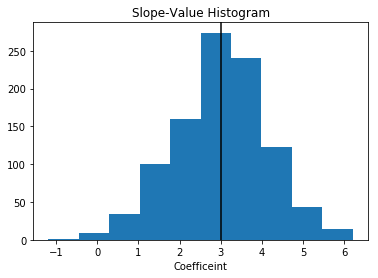

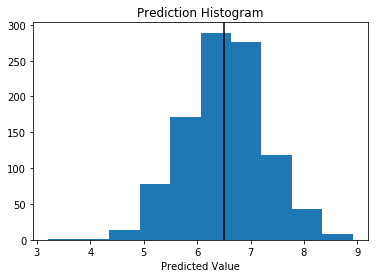

In [9]:
gen_hist(1000, 'ana')

The mean slope is : 1.7254911155578032


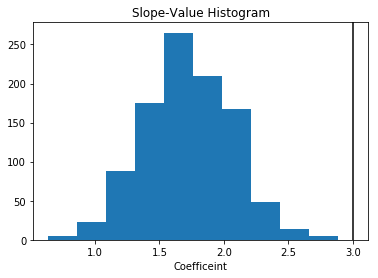

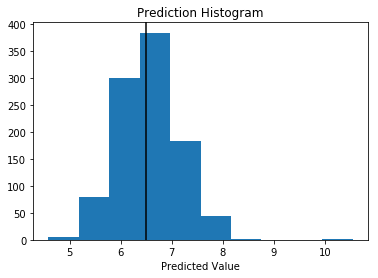

In [10]:
gen_hist(1000, 'ana2', lam=5)

The mean slope is : 0.0017328152211612932


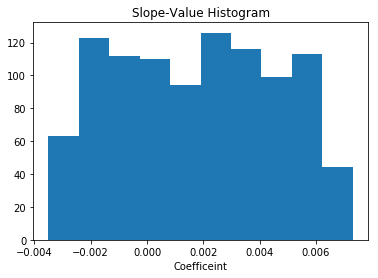

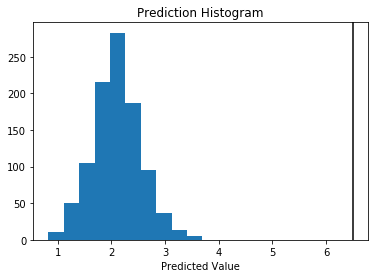

In [11]:
gen_hist(1000, 'gd', lam=5)

D) Repeat (b) for a range of λ (one iteration for each λ). Plot the coefficient associated
with X as function of λ, and overlay the true value. Plot the predictions Yˆ for
X = 1.5 as function of λ, and overlay the true expected value.

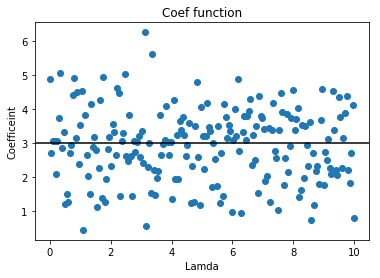

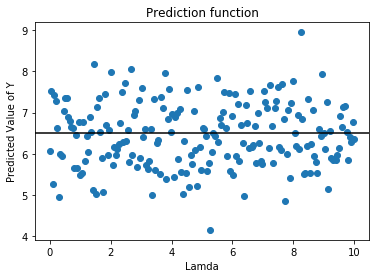

In [12]:
gen_lam('ana', 200)

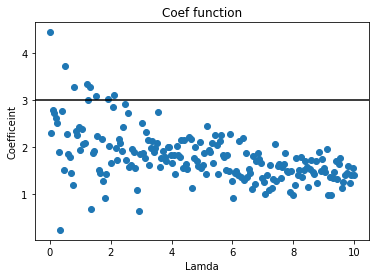

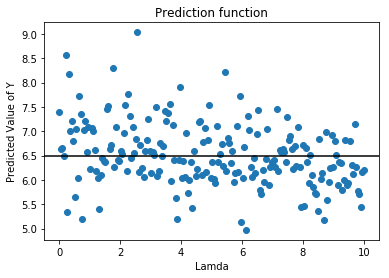

In [13]:
gen_lam('ana2', 200)

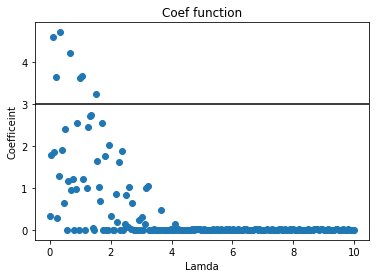

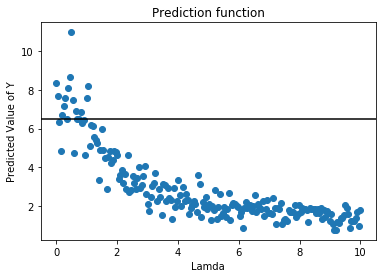

In [14]:
gen_lam('gd', 200)

E) Comments and Observation.

Because of selecting lambda as 5, the lasso model penalizes the thetas very much making them 0. As you can see from the graph that shows predicted values as a function of lamda, at lamda around 1 to 2, we get very close to the real values.

The ridge and the analytical solutions do not penalize the parameters as much as the lasso does and hence the predicted value is normal distributed around the true value. However it is intresting to see that the ridge regression penalizes the first order X feature not as close to 0 as much as lasso does.

# Q5

Read the data

In [15]:
cols = ['IdentificationNumber','SalesPrice','FinishedSquareFeet','NumberOfBedrooms','NumberOfBathrooms',
        'AC','GarageSize','Pool','YearBuilt','Quality','Style','LotSize','AdjacentToHighway']
X_data = pd.read_csv('hw2_dataset.txt', delimiter='    ', header=None, engine='python', dtype=int)
X_data.columns = cols

(a) Select the training set

In [16]:
X_data = X_data.sample(frac=1).reset_index(drop=True) # Shuffle the Dataset
X_i = X_data[['FinishedSquareFeet','NumberOfBedrooms','NumberOfBathrooms','AC','GarageSize','Pool',
              'YearBuilt','Quality','Style','LotSize','AdjacentToHighway']]
Y = normalize(X_data['SalesPrice'].values.reshape(1,-1))[0] #Normalize the target variable.

In [17]:
## Split the shuffled data into train, development and test/eval sets
X_train = X_i.iloc[0:200]
Y_train = Y[0:200]

X_dev = X_i.iloc[200:400]
Y_dev = Y[200:400]

X_test = X_i.iloc[401:]
Y_test = Y[401:]
X_i.shape, Y.shape, X_train.shape, Y_train.shape, X_dev.shape, Y_dev.shape, X_test.shape, Y_test.shape

((522, 11), (522,), (200, 11), (200,), (200, 11), (200,), (121, 11), (121,))

(b) Data exploration:

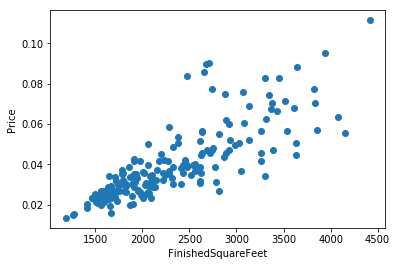

In [18]:
plt.plot(X_train['FinishedSquareFeet'], Y_train, 'o')
plt.xlabel('FinishedSquareFeet')
plt.ylabel('Price')
plt.show()

One can clearly see a linear trend in this graph

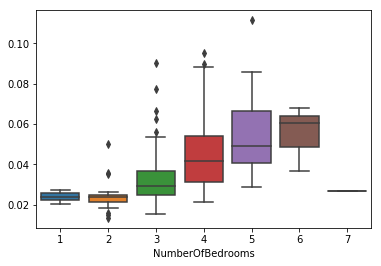

In [19]:
sns.boxplot(x=X_train['NumberOfBedrooms'], y=Y_train)

It can be observed that the mean pirce values of each of the bedroom category is different from the previous one and a linear growth can also be observed

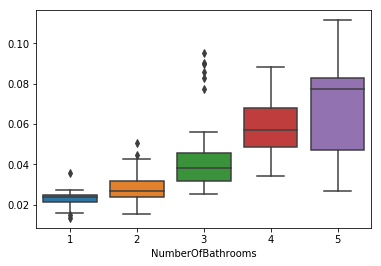

In [20]:
sns.boxplot(x=X_train['NumberOfBathrooms'], y=Y_train)

Similar to the bedrooms, no. of bathroom also impacts the price of the house

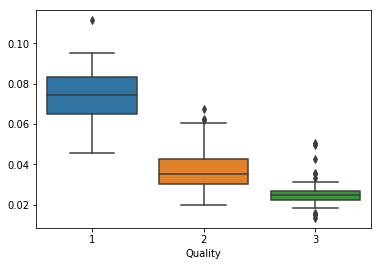

In [21]:
sns.boxplot(x=X_train['Quality'], y=Y_train)

Different quality of the house, have different range in price, almost have 0 overlap which can be one of the important features

c) Assumption of Normality:

In [22]:
lr = LinearRegression()
lr.fit(X_train, Y_train)
Y_train_pred = lr.predict(X_train)
residuals = abs(np.subtract(Y_train_pred, Y_train))

Residuals vs FinishedSquareFeet


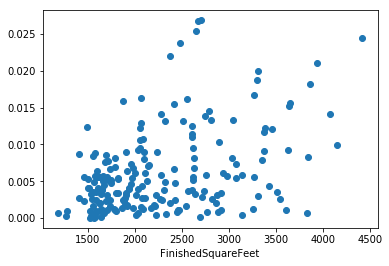

Residuals vs NumberOfBedrooms


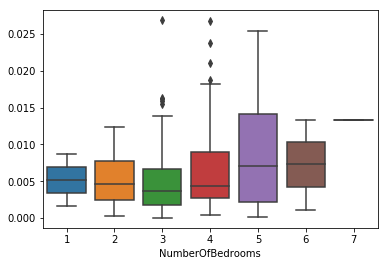

Residuals vs NumberOfBathrooms


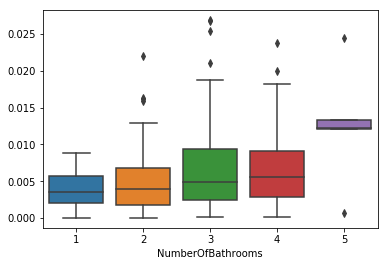

Residuals vs AC


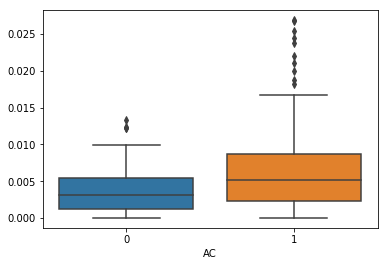

Residuals vs GarageSize


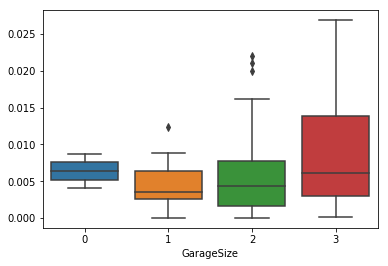

Residuals vs Pool


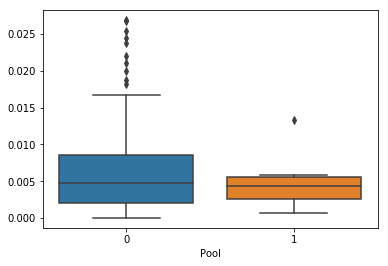

Residuals vs YearBuilt


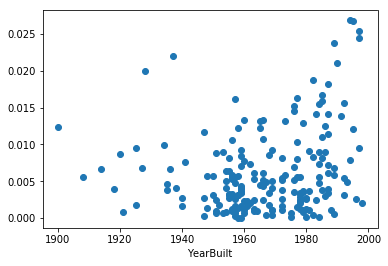

Residuals vs Quality


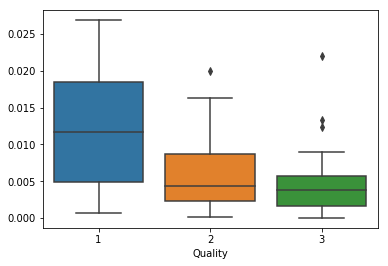

Residuals vs Style


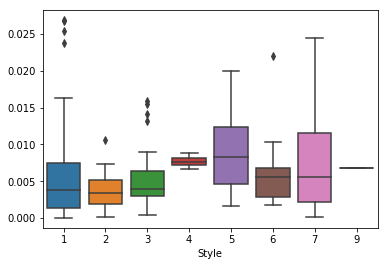

Residuals vs LotSize


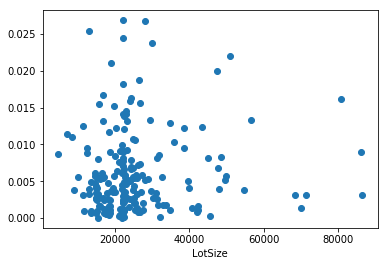

Residuals vs AdjacentToHighway


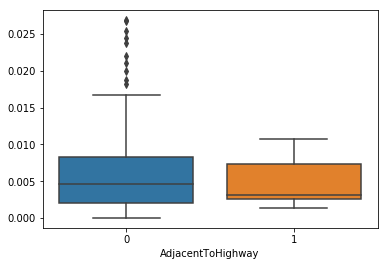

In [23]:
flag = [0,1,1,1,1,1,0,1,1,0,1]
cols = X_train.columns
for i in range(0, len(cols)):
    item = cols[i]
    x = X_train[item]
    print("Residuals vs " +item)
    if flag[i] == 0:
        plt.plot(x,residuals, 'o')
        plt.xlabel(item)
        plt.show()
    else:
        sns.boxplot(x=x, y=residuals)
        plt.show()

The above are the residual plots with each of the features. The information present in the features like Quality and YearBuilt do not seem to be captured completely by the model

(d) Variable selection: Perform variable selection using all subsets selection

In [24]:
#Method for generating powerset
def powerset(iterable):
    "list(powerset([1,2,3])) --> [(), (1,), (2,), (3,), (1,2), (1,3), (2,3), (1,2,3)]"
    s = list(iterable)
    return list(chain.from_iterable(combinations(s, r) for r in range(len(s)+1)))

In [25]:
#Getting all subsets of column
all_feature_sub = powerset(['FinishedSquareFeet','NumberOfBedrooms','NumberOfBathrooms','AC',
                            'GarageSize','Pool','YearBuilt','Quality','Style','LotSize','AdjacentToHighway'])

In [26]:
#Generating dummies and updating the train, devlopment and test/eval dataframes with dummy variables 
#[Note the data is still shuffled we are only adding more colums]
X_i = pd.get_dummies(X_data[['FinishedSquareFeet','NumberOfBedrooms','NumberOfBathrooms','AC','GarageSize',
                             'Pool','YearBuilt','Quality','Style','LotSize','AdjacentToHighway']], 
                     columns=['NumberOfBedrooms','NumberOfBathrooms','AC','GarageSize','Pool','Quality',
                              'Style','AdjacentToHighway'])

X_train = X_i.iloc[0:200]

X_dev = X_i.iloc[200:400]

X_test = X_i.iloc[401:]

In [27]:
#Method to select dummy column name based on original column name
def gen_dummy_data(cols,X,X_d):
    s = '|'.join(cols)
    s = re.compile(s)
    return X.filter(regex=s), X_d.filter(regex=s)

In [28]:
#method for fitting one model
def fit_pred_linear(X,Y, X_dev, Y_dev):
    lr = LinearRegression()
    lr.fit(X, Y)
    Y_train_pred = lr.predict(X_dev)
    x = mean_squared_error(Y_train_pred, Y)
    score = lr.score(X_dev, Y_dev)
    return score, lr

In [29]:
#method for calc score (R^2) of each of subset
def calc_rms_all_subset(subsets, X, Y, X_d, Y_dev):
    score = []
    model = []
    for item in subsets:
        X_i, X_dev = gen_dummy_data(set(item), X, X_d)
        s, m = fit_pred_linear(X_i, Y, X_dev, Y_dev)
        score.append(s)
        model.append(m)
    return score, model

In [30]:
score, model = calc_rms_all_subset(all_feature_sub, X_train, Y_train, X_dev, Y_dev)

In [31]:
all_feature_sub[np.where(score == max(score))[0][0]]

('FinishedSquareFeet',
 'NumberOfBedrooms',
 'AC',
 'GarageSize',
 'Pool',
 'YearBuilt',
 'Quality',
 'Style',
 'LotSize',
 'AdjacentToHighway')

The best model amongst all the subset is with the above features

In [32]:
best_feature_subset = all_feature_sub[np.where(score == max(score))[0][0]]
best_subset_model = model[np.where(score == max(score))[0][0]]

e) Variable selection: Consider the training set only. Perform variable selection
using ridge regularization.

In [33]:
rdc = RidgeCV(alphas=np.linspace(-10,10,200))
rdc.fit(X_train, Y_train)
r_alpha = rdc.alpha_
rd = Ridge(alpha=r_alpha)
rd.fit(X_train, Y_train)
rd_coefs = rd.coef_

In [34]:
X_train.columns[np.argsort(rd_coefs)[::-1][:10]]

Index(['Quality_1', 'NumberOfBedrooms_5', 'Style_1', 'NumberOfBathrooms_5',
       'GarageSize_3', 'Style_6', 'NumberOfBathrooms_4', 'NumberOfBathrooms_3',
       'Style_4', 'AdjacentToHighway_0'],
      dtype='object')

Top features according to ridge regression include No. of Bathroom, No. of Bedroom, Quality, Style, GarageSize

f) Variable selection: Consider the training set only. Perform variable selection
using lasso regularization.

In [35]:
ldc = LassoCV(alphas=np.linspace(-10,10,200))
ldc.fit(X_train, Y_train)
l_alpha = ldc.alpha_
las = Lasso(alpha=l_alpha)
las.fit(X_train, Y_train)
X_train.columns[np.where(las.coef_ != 0)]

Index(['FinishedSquareFeet', 'YearBuilt', 'LotSize'], dtype='object')

Top features according to Lasso regression

g) Performance evaluation: 

In [38]:
X_i, X_sub_test = gen_dummy_data(best_feature_subset, X_train, X_test)
print('Best score of all subset:' , best_subset_model.score(X_sub_test, Y_test))
print('Accuracy score of Ridge:', rd.score(X_test, Y_test))
print('Accuracy score of Lasso:', las.score(X_test, Y_test))

Best score of all subset: 0.8212530651460103
Accuracy score of Ridge: 0.8317200106531053
Accuracy score of Lasso: 0.7150199236245619


The best results is Ridge regression, however one must note that the best subset also gives almost similiar result. During my other runs, depending on the split of the data, best subset gave better accuracy than Ridge. Lasso accuracy is too low as it heavily peanlizes the categorical variables and makes them 0, however it was seen clearly in the data exploration stage that some of the categorical variables show high correlation with the housing price 

h) Interpretation of the results: 

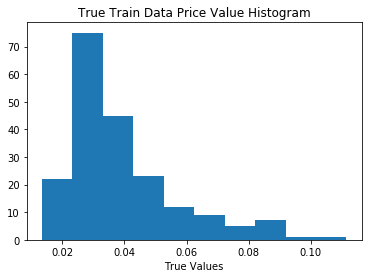

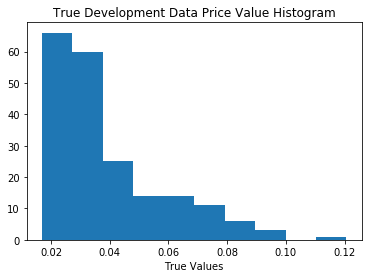

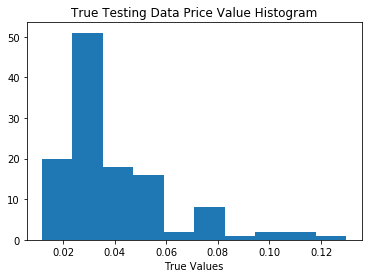

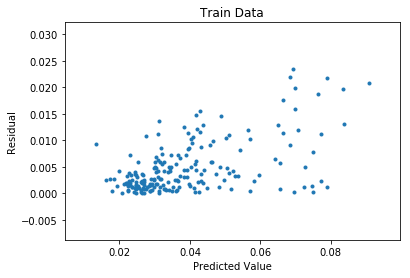

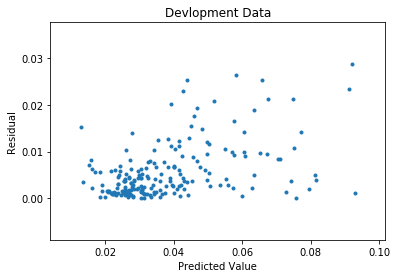

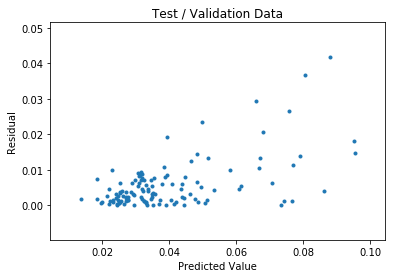

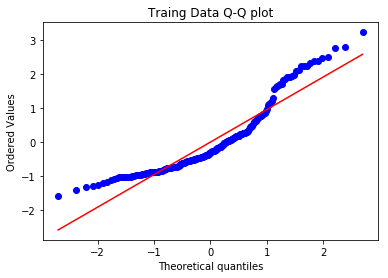

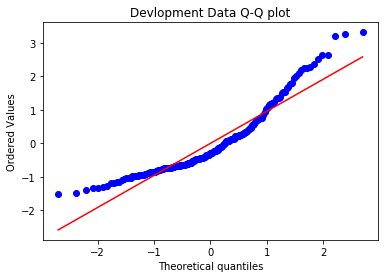

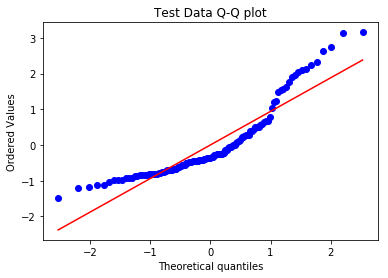

In [40]:
Y_train_pred = rd.predict(X_train)
Y_val_pred = rd.predict(X_dev)
Y_test_pred = rd.predict(X_test)

train_residuals = abs(np.subtract(Y_train_pred, Y_train))
dev_residuals = abs(np.subtract(Y_val_pred, Y_dev))
test_residuals = abs(np.subtract(Y_test_pred, Y_test))

plt.hist(Y_train)
plt.title('True Train Data Price Value Histogram')
plt.xlabel('True Values')
plt.show()
plt.hist(Y_dev)
plt.title('True Development Data Price Value Histogram')
plt.xlabel('True Values')
plt.show()
plt.hist(Y_test)
plt.title('True Testing Data Price Value Histogram')
plt.xlabel('True Values')
plt.show()

plt.scatter(Y_train_pred, train_residuals, cmap='jet', marker='.')
plt.title('Train Data')
plt.xlabel('Predicted Value')
plt.ylabel('Residual')
plt.show()
plt.scatter(Y_val_pred, dev_residuals, cmap='jet', marker='.')
plt.title('Devlopment Data')
plt.xlabel('Predicted Value')
plt.ylabel('Residual')
plt.show()
plt.scatter(Y_test_pred, test_residuals, cmap='jet', marker='.')
plt.title('Test / Validation Data')
plt.xlabel('Predicted Value')
plt.ylabel('Residual')
plt.show()
                     
                     
z = (Y_train_pred-np.mean(Y_train_pred))/np.std(Y_train_pred)
stats.probplot(z, dist="norm", plot=plt)
plt.title("Traing Data Q-Q plot")
plt.show()
z = (Y_val_pred-np.mean(Y_val_pred))/np.std(Y_val_pred)
stats.probplot(z, dist="norm", plot=plt)
plt.title("Devlopment Data Q-Q plot")
plt.show()
z = (Y_test_pred-np.mean(Y_test_pred))/np.std(Y_test_pred)
stats.probplot(z, dist="norm", plot=plt)
plt.title("Test Data Q-Q plot")
plt.show()

As you can see the data is positively skewed, hence it can be clearly seen in the QQ plot that the information is completely captured. 
In the residual plot one can observe that the data is randomly scattered and hence we can conclude that the model is the right fit and all information has been captured